# Analisis de series de tiempo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("datasets/Telefonia_movil.csv")

In [3]:
df = df.drop(columns=["Periodo"])

In [4]:
df["fecha"] = pd.to_datetime(df["Año"].astype(str) + "Q" + df["Trimestre"].astype(str))

In [5]:
df = df.set_index("fecha")

In [6]:
df.index = df.index.to_period(freq = "Q")

In [7]:
df["Minutos pospago salientes (miles)"] = pd.to_numeric(df["Minutos pospago salientes (miles)"].str.replace(".", ""))

<Figure size 1440x720 with 0 Axes>

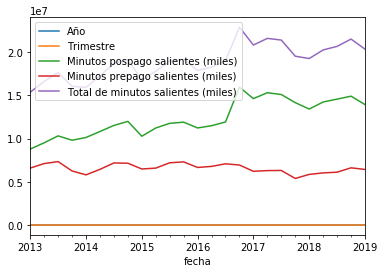

In [8]:
plt.figure(figsize=(20, 10))
df.plot()

In [9]:
df = df.rename(columns={
    "Minutos pospago salientes (miles)": "pospago",
    "Minutos prepago salientes (miles)": "prepago",
    "Total de minutos salientes (miles)": "total",
    "Año": "year",
    "Trimestre": "quarter"
})


In [10]:
len(df["year"].value_counts())

7

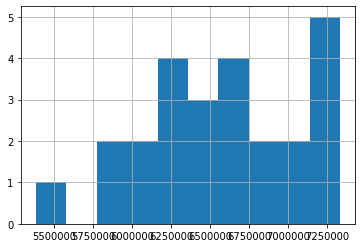

In [11]:
df["prepago"].hist(bins=10)

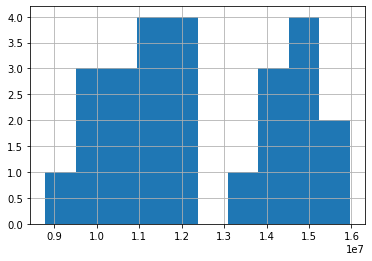

In [12]:
df["pospago"].hist(bins=10)

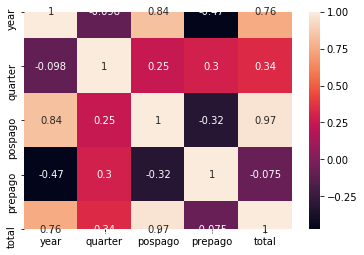

In [13]:
sns.heatmap(df.corr(), annot=True)

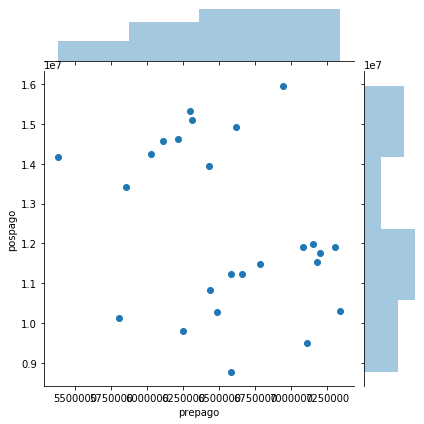

In [14]:
sns.jointplot(x="prepago", y="pospago", data=df)

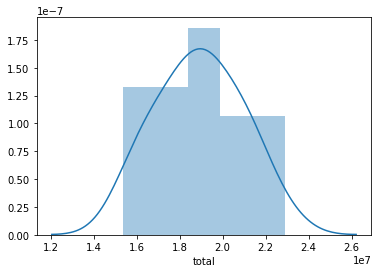

In [15]:
sns.distplot(df["total"])

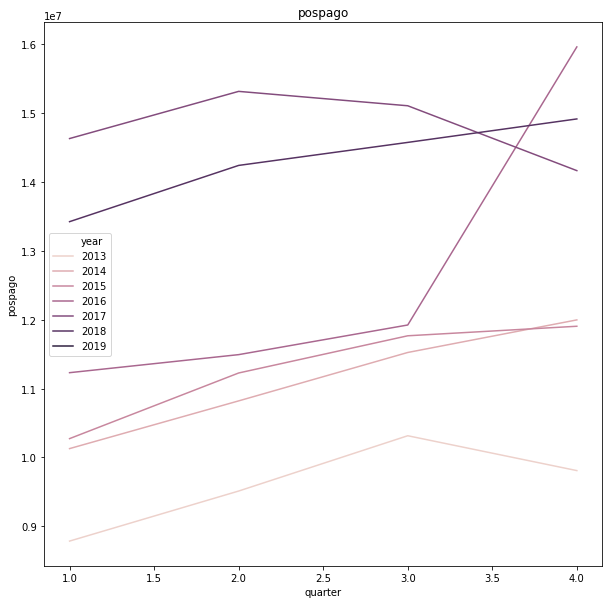

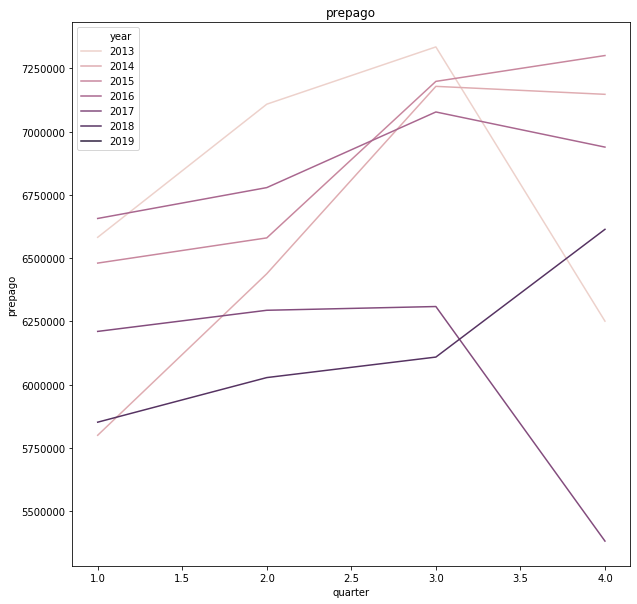

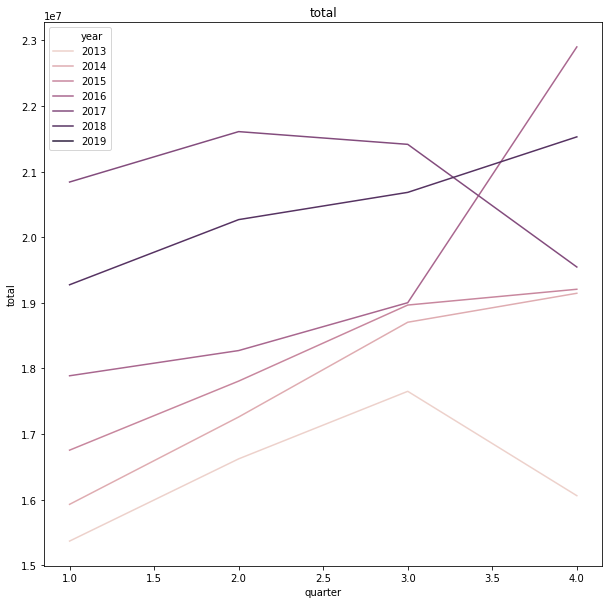

In [16]:
for i in df.drop(columns=["quarter", "year"]).columns:
    plt.figure(figsize=(10, 10))
    plt.title(i)
    sns.lineplot("quarter", i, hue="year", data=df, markers='None', legend="full")
    plt.show()

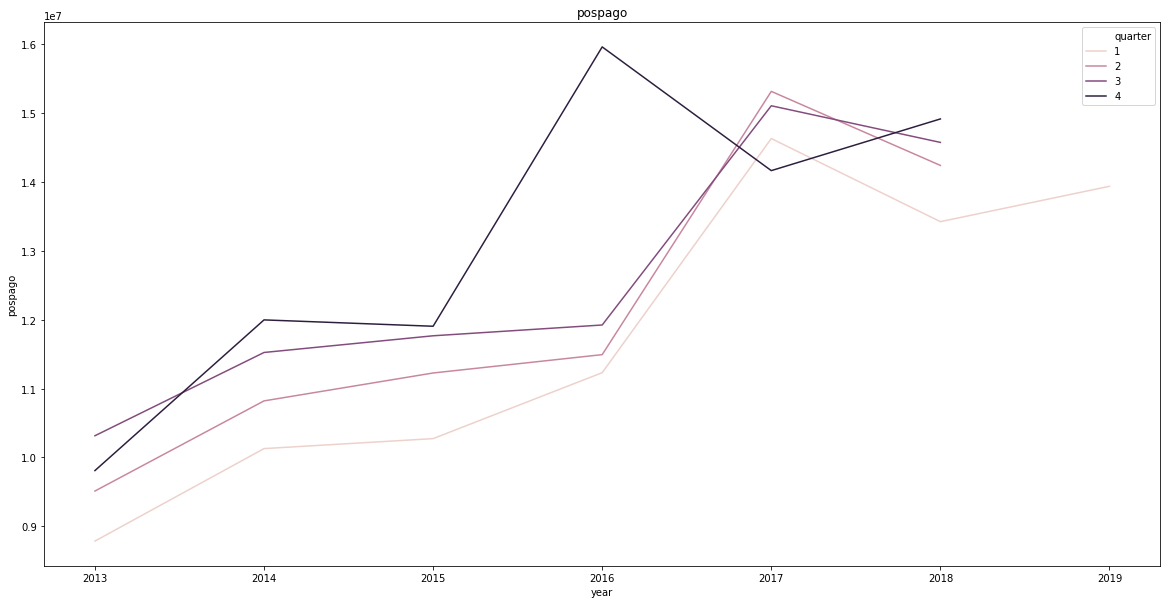

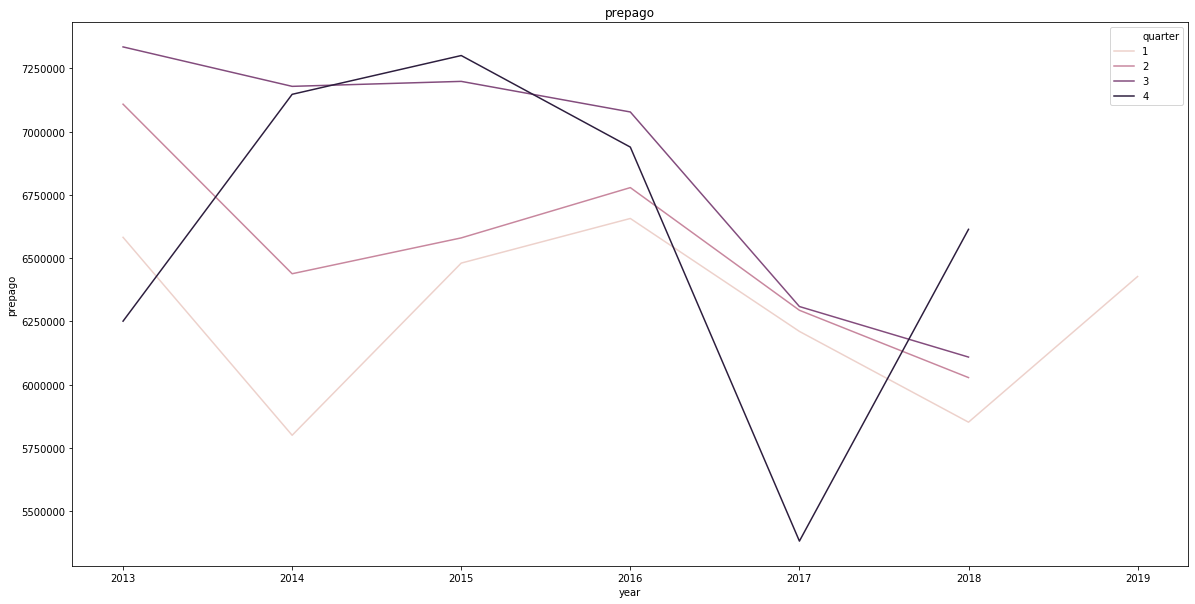

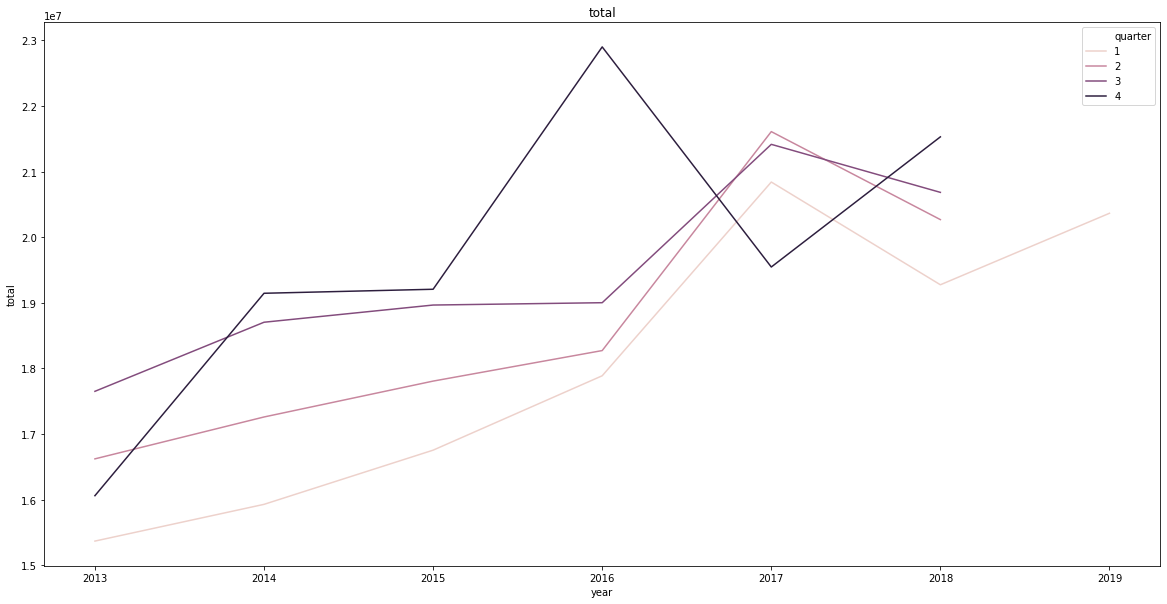

In [17]:
for i in df.drop(columns=["quarter", "year"]).columns:
    plt.figure(figsize=(20, 10))
    plt.title(i)
    sns.lineplot("year", i, hue="quarter", data=df, markers='None', legend="full")
    plt.show()

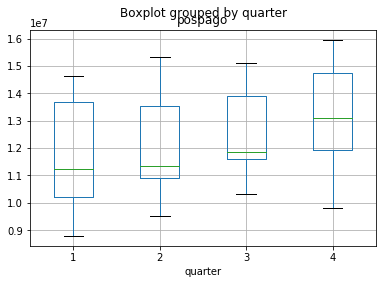

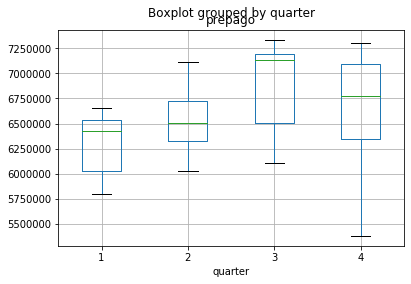

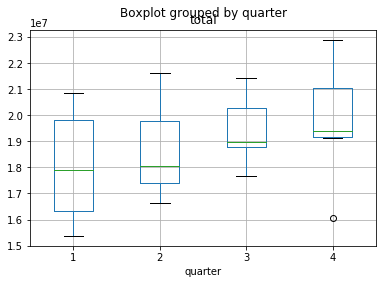

In [18]:
for i in df.drop(columns=["quarter", "year"]).columns:
    
    df.boxplot(column=i, by='quarter');


1


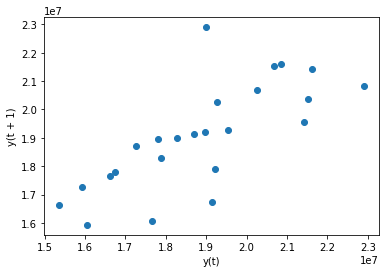

2


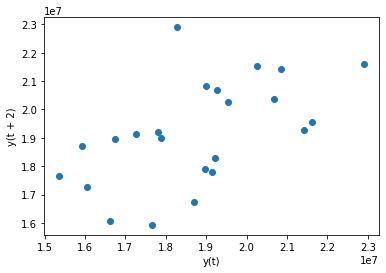

3


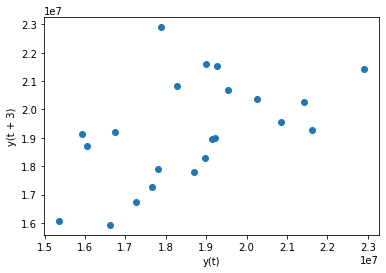

4


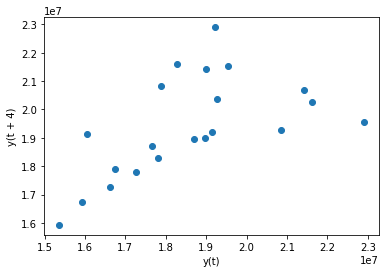

5


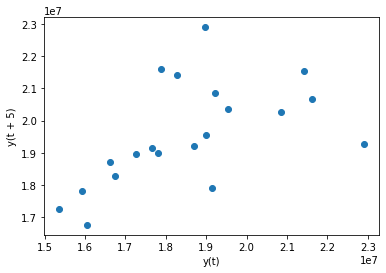

6


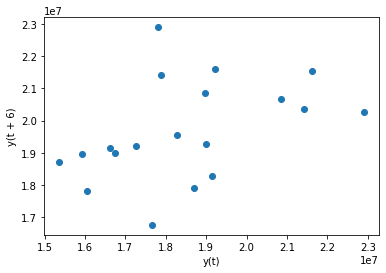

7


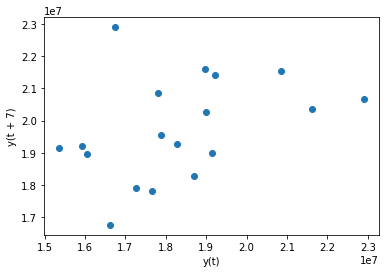

8


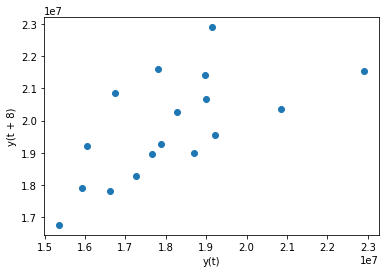

9


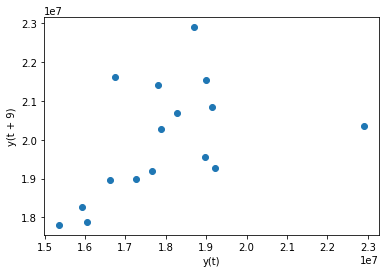

10


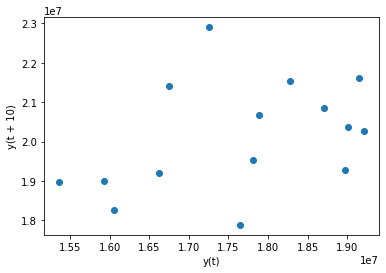

11


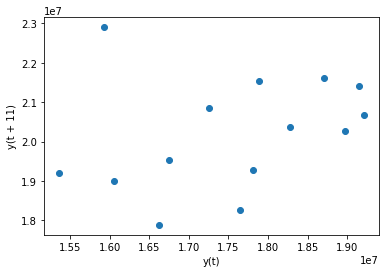

12


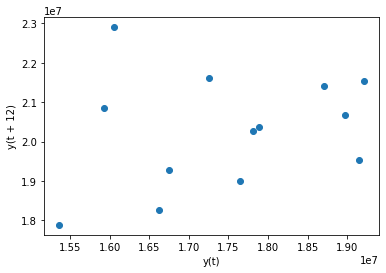

13


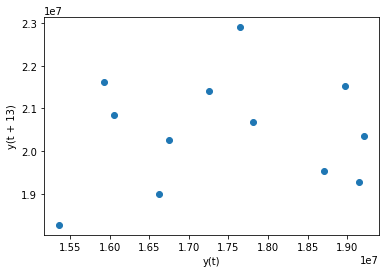

14


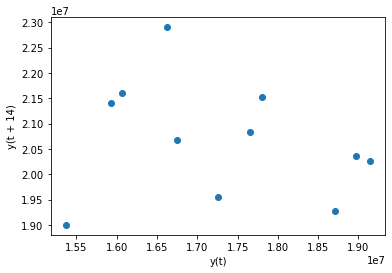

15


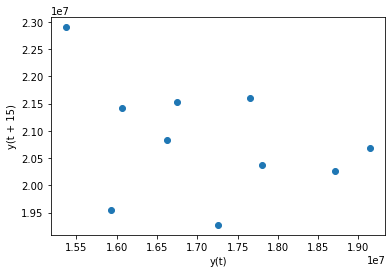

16


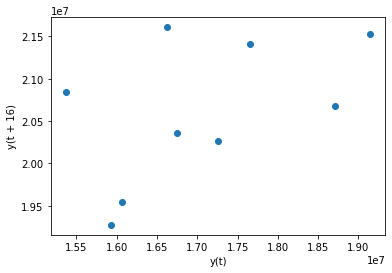

17


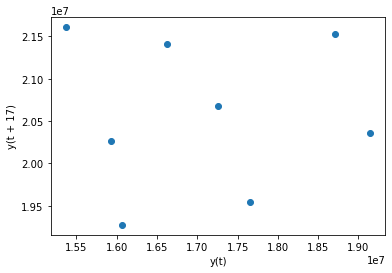

18


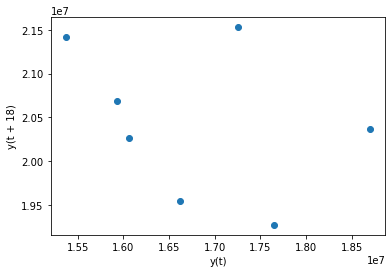

19


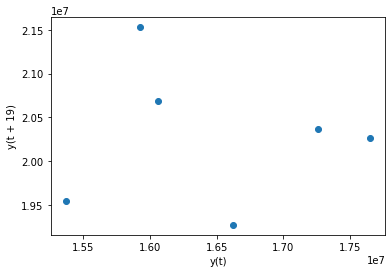

20


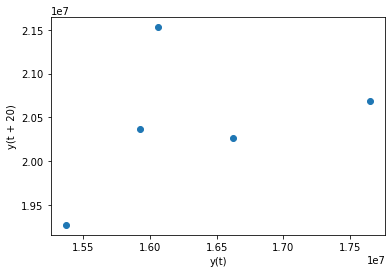

21


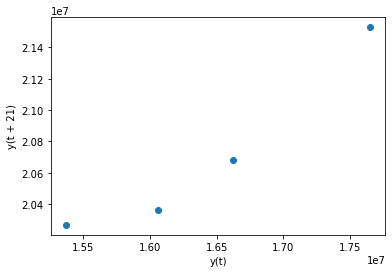

22


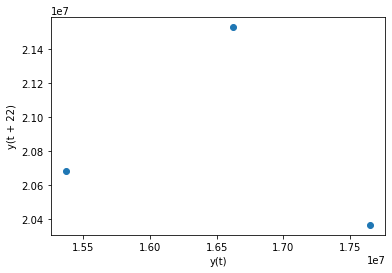

23


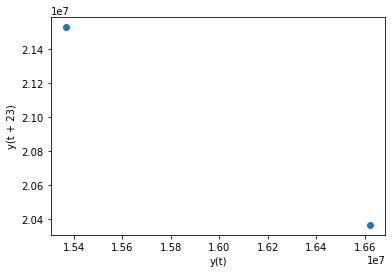

24


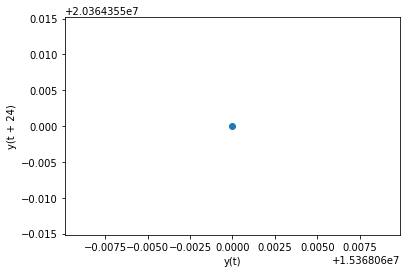

25


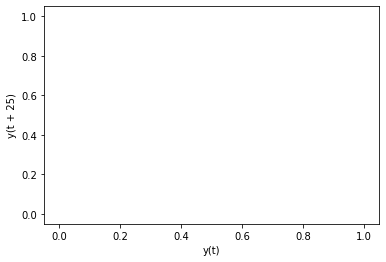

26


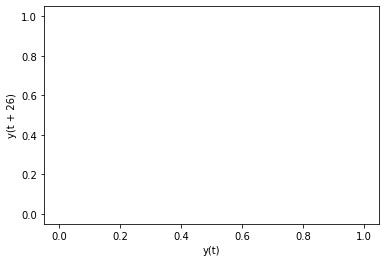

27


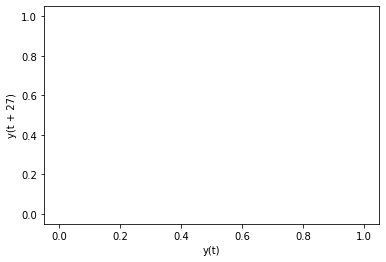

28


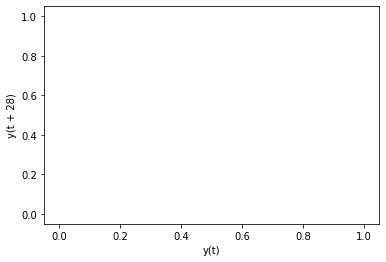

29


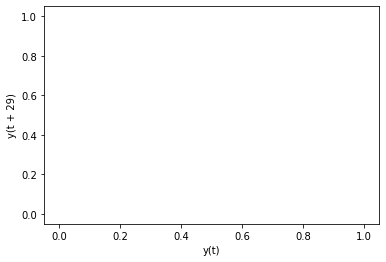

In [19]:
for i in range(1,30):
    print(i)
    pd.plotting.lag_plot(df["total"], lag=i)
    plt.show()

### Random Walk (Naïve)

In [20]:
h = 4
y = df["prepago"]
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
Freq: Q-DEC, dtype: int64

In [21]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

510832.977

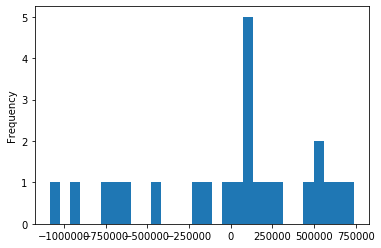

In [22]:
resid.plot.hist(bins=30);

In [23]:
np.arange(1,h+1)

array([1, 2, 3, 4])

In [24]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019Q2,5425869.763,7428298.237
2019Q3,5011153.247,7843014.753
2019Q4,4692930.072,8161237.928
2020Q1,4424655.526,8429512.474


In [26]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['1980':],point_pred,intv,intv,intv)

plt.show()

ModuleNotFoundError: No module named 'plotting'

### Exponential Smoothing

In [ ]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

In [ ]:
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))

In [ ]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

In [ ]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color="red", label='Inflation')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Australian Quarterly CPI Inflation')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()